# Tutorial: CommonRoad Route Planner

This tutorial demonstrates how the CommonRoad Route Planner package can be used to plan high-level routes for planning problems given in CommonRoad scenarios.

## 0. Preparation
* you have gone through the tutorial for **CommonRoad Input-Output**
* you have installed the [route planner](https://gitlab.lrz.de/tum-cps/commonroad-route-planner) package

Let's start with importing relevant modules and classes.

In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys

# add the root folder to python path
path_notebook = os.getcwd()
sys.path.append(os.path.join(path_notebook, "../"))

import matplotlib.pyplot as plt
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad_route_planner.route_planner import RoutePlanner
from commonroad_route_planner.utility.visualization import visualize_route
from commonroad.visualization.mp_renderer import MPRenderer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Loading CR Scenario and Planning Problem
In the next step, we load a CommonRoad scenario and its planning problem(s), for which the routes should be planned. The route planner handles **one planning problem** at a time, thus we need to manually specify the planning problem for which the routes should be planned. In our case, we select the first planning problem in the planning problem set. The meaning of the symbols in a scenario are explained as follows:
* **Dot**: initial state of the planning problem projected onto the position domain
* **Blue rectangle**: dynamic obstacle
* **Yellow rectangle**: goal region projected onto the position domain

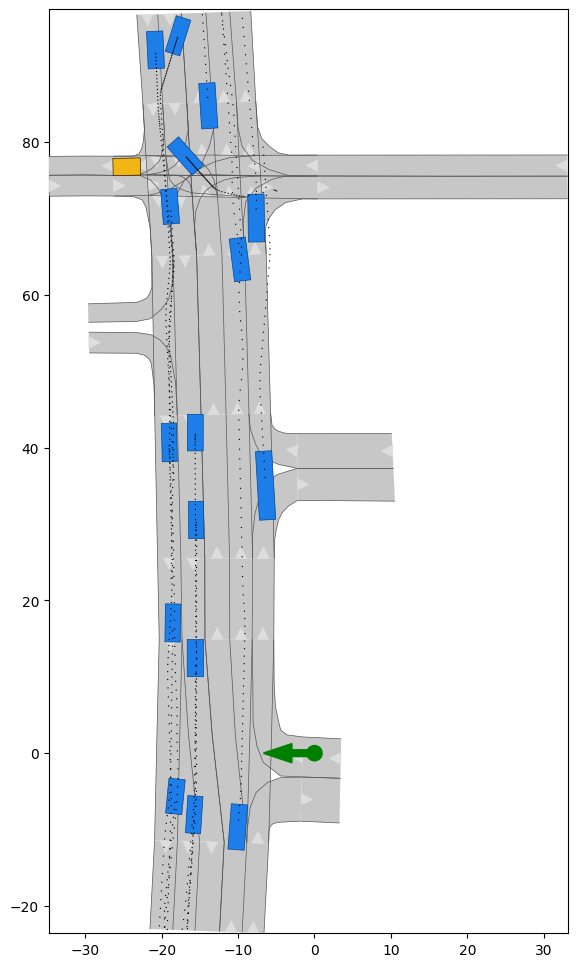

In [8]:
# load scenario
path_scenario = os.path.join(path_notebook, "../scenarios/")
id_scenario = 'USA_Peach-2_1_T-1'

# read in scenario and planning problem set
scenario, planning_problem_set = CommonRoadFileReader(path_scenario + id_scenario + '.xml').open()
# retrieve the first planning problem in the problem set
planning_problem = list(planning_problem_set.planning_problem_dict.values())[0]

# plot the scenario and the planning problem set
renderer = MPRenderer(figsize=(12, 12))

scenario.draw(renderer)
planning_problem.draw(renderer)

renderer.render()
plt.margins(0, 0)

## 2. Creating a route planner and planning for routes

### 2.1 Instantiation
A route planner can be easily constructed by passing the **scenario** and the **planning problem** to `RoutePlanner` object. As for the backend, there are currently three supported options:
1. NETWORKX: uses built-in functions from the networkx package, tends to change lane later
2. NETWORKX_REVERSED: uses built-in functions from the networkx package, tends to change lane earlier
3. PRIORITY_QUEUE: uses A-star search to find routes, lane change maneuver depends on the heuristic cost

### 2.2 Planning all possible routes
The route planner plans a route for all possible combinations of start / goal lanelets. E.g. if our initial state is located in two lanes (due to overlapping of lanelets), and the same for our goal state, the route planner will try to plan routes for the four possible combinations.

### 2.3 Retrieving a route
Planned routes can be retrieved by using simple indices, or based on some heuristic functions to determine the best route of all. A route consists of a list of lanelet ids that leads from the initial state to the goal state.

### 2.4 Retrieving reference path
A reference path is automatically generated for each planned routes. The center lines of lanelets of a route is used to construct the reference path. The resulting polyline is then smoothened with Chaikin's corner cutting algorithm.

In [9]:
# instantiate a route planner with the scenario and the planning problem
route_planner = RoutePlanner(scenario, planning_problem, backend=RoutePlanner.Backend.NETWORKX_REVERSED)
# alternatively, the route planner accepts a lanelet network, an initial state and a goal region
# route_planner = RoutePlanner(lanelet_network=scenario.lanelet_network, state_initial=planning_problem.initial_state,
#                              goal_region=planning_problem.goal, backend=RoutePlanner.Backend.NETWORKX, reach_goal_state=False)

# plan routes, and save the routes in a route candidate holder
candidate_holder = route_planner.plan_routes()

# option 1: retrieve all routes
list_routes, num_route_candidates = candidate_holder.retrieve_all_routes()
print(f"Number of route candidates: {num_route_candidates}")
# here we retrieve the first route in the list, this is equivalent to: route = list_routes[0]
route = candidate_holder.retrieve_first_route()

# option 2: retrieve the best route by orientation metric
# route = candidate_holder.retrieve_best_route_by_orientation()

# print coordinates of the vertices of the reference path
print("\nCoordinates [x, y]:")
print(route.reference_path)

Number of route candidates: 1

Coordinates [x, y]:
[[  3.438       -0.70515   ]
 [  3.43019433  -0.70482346]
 [  3.41458298  -0.70417039]
 ...
 [-26.32605728  76.87957036]
 [-26.33378576  76.87945679]
 [-26.33765     76.8794    ]]


## 3. Visualizing planning results

The planned routes can be easily visualized with the `visualize_route` function. The arguements `draw_route_lanelets` and `draw_reference_path` indicates whether the lanelets of the route and the reference path should be drawn, respectively. The lanelets of the route is colored in green.

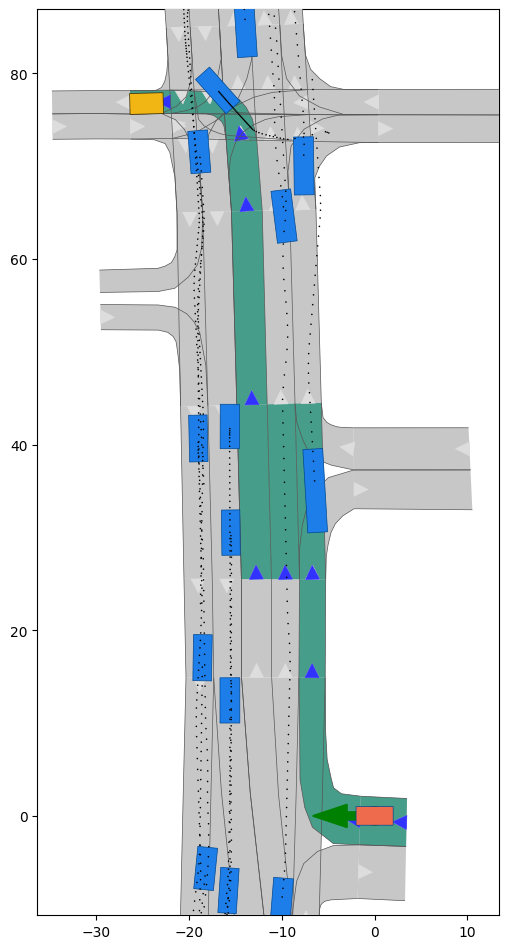

In [12]:
visualize_route(route, draw_route_lanelets=True, draw_reference_path=False, size_x=6)

We now plot the generated reference path as well, which is colored in red.

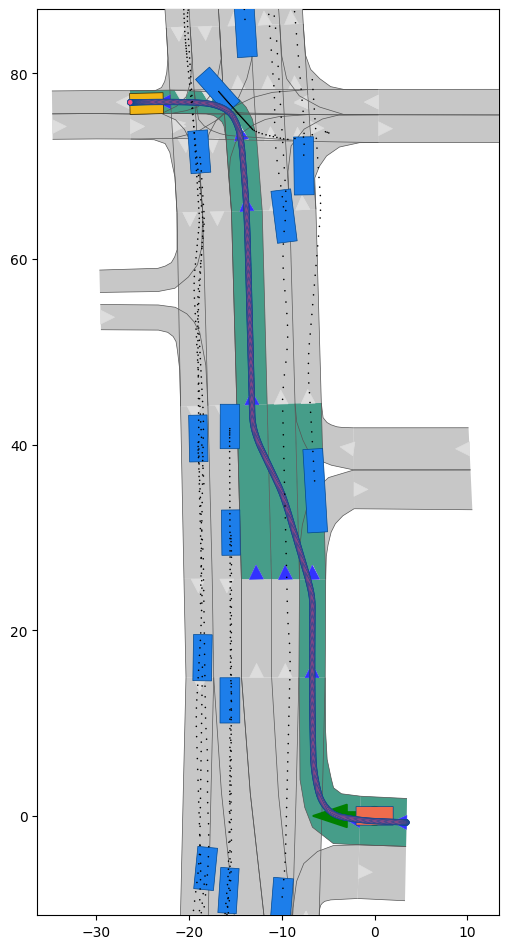

In [11]:
visualize_route(route, draw_route_lanelets=True, draw_reference_path=True, size_x=6)